# Фильтрация кропнутых фото по DataFrame

In [1]:
!git clone https://github.com/Gordondalos/aii-practica-1.git

Cloning into 'aii-practica-1'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 6), reused 20 (delta 3), pack-reused 0
Unpacking objects: 100% (23/23), 3.45 MiB | 2.83 MiB/s, done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import PIL

In [3]:
df = pd.read_csv('/content/aii-practica-1/my_dataframe.csv')
df

,file_name,center_x,center_y,a,b,c,d,x,y,w,h,ssim,psnr,mse,histDitance,hashPercent,hash
0,./crop/0-rKhHt.jpg,1125.5,644.5,1296.969738,1296.969738,1296.969738,1296.969738,1051,556,1200,733,1.000000,1.000000,0.000000,0,NaN,NaN
1,./crop/0-0b0Pv.jpg,1125.5,644.5,1296.969738,1296.969738,1296.969738,1296.969738,1051,556,1200,733,1.000000,361.201999,0.000000,0,NaN,NaN
2,./crop/0-J1C2S.jpg,1125.5,644.5,1296.969738,1296.969738,1296.969738,1296.969738,1051,556,1200,733,1.000000,361.201999,0.000000,0,NaN,NaN
3,./crop/0-4YLcw.jpg,1153.0,714.0,1356.172924,1356.172924,1356.172924,1356.172924,1026,535,1280,893,0.132794,12.339354,87.931129,253,NaN,NaN
4,./crop/1-Y6Wa5.jpg,1112.0,741.5,1336.550130,1336.550130,1336.550130,1336.550130,945,502,1279,981,0.244592,12.044071,71.724329,252,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20628,./crop/8192-CbsRa.jpg,1144.0,593.0,1288.559273,1288.559273,1288.559273,1288.559273,1051,452,1237,734,0.312610,12.880445,73.481969,255,99.812500,1.728024e+19
20629,./crop/8193-906Z8.jpg,1151.5,571.5,1285.521101,1285.521101,1285.521101,1285.521101,1076,479,1227,664,0.231767,11.511498,84.490448,255,99.718750,1.842860e+19
20630,./crop/8193-Wh3e3.jpg,971.0,812.5,1266.095277,1266.095277,1266.095277,1266.095277,717,625,1225,1000,0.124569,11.157077,93.462824,256,99.593750,1.794149e+19
20631,./crop/8194-6N5Pt.jpg,1123.5,609.5,1278.179369,1278.179369,1278.179369,1278.179369,1052,464,1195,755,0.189518,10.971950,98.587844,256,99.593750,1.728756e+19


## Фильтрация по ширине колонка w

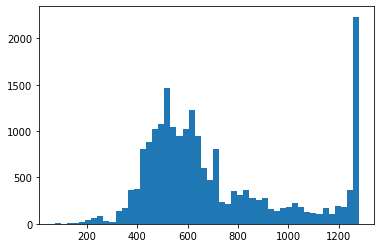

In [4]:
# На данном графике мы видим распределение по ширине
# Попробуем выбрать в ручную фильтрацию где-то в
# пределах от 300 до 800
plt.hist(df.w, bins=50)
plt.show()

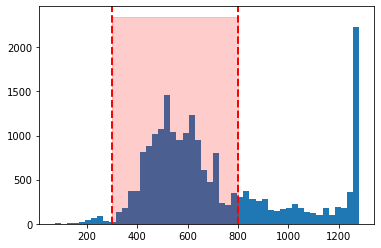

In [5]:
# Отобразим график с явно выраженной фильтрацией
fig, ax = plt.subplots()
ax.hist(df.w, bins=50)
ax.axvline(300, color='r', linestyle='dashed', linewidth=2)
ax.axvline(800, color='r', linestyle='dashed', linewidth=2)
ax.fill_between([300, 800], 0, ax.get_ylim()[1], color='r', alpha=0.2)
plt.show()

In [6]:
# Отфильтровав dataframe по ширине, 
# мы получили 14232 строки
df_ = df[(df.w > 300) & (df.w < 800)]
df_.reset_index(drop=True, inplace=True)
df_

,file_name,center_x,center_y,a,b,c,d,x,y,w,h,ssim,psnr,mse,histDitance,hashPercent,hash
0,./crop/14-XUh5A.jpg,605.5,737.0,953.833974,953.833974,953.833974,953.833974,420,494,791,980,0.155780,8.644739,94.591283,256,NaN,NaN
1,./crop/15-2qYT2.jpg,610.0,741.0,959.781746,959.781746,959.781746,959.781746,433,488,787,994,0.516124,15.179569,59.019363,254,NaN,NaN
2,./crop/16-GNl94.jpg,610.5,738.0,957.786119,957.786119,957.786119,957.786119,432,480,789,996,0.546068,16.071836,58.937635,254,NaN,NaN
3,./crop/17-FsX17.jpg,610.5,753.5,969.779614,969.779614,969.779614,969.779614,428,511,793,996,0.513979,15.318288,74.748192,256,NaN,NaN
4,./crop/18-39H2g.jpg,603.0,759.5,969.767627,969.767627,969.767627,969.767627,416,525,790,994,0.560073,15.490133,51.550802,254,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14227,./crop/8152-lx8WQ.jpg,650.5,574.5,867.871246,867.871246,867.871246,867.871246,556,303,745,846,0.154663,12.118454,109.607571,255,99.625000,1.844674e+19
14228,./crop/8153-MPFZK.jpg,595.5,533.0,799.192874,799.192874,799.192874,799.192874,486,293,705,773,0.163389,11.570600,106.281087,256,99.656250,1.838348e+19
14229,./crop/8166-YwAb3.jpg,630.5,618.0,882.867062,882.867062,882.867062,882.867062,533,373,728,863,0.240518,13.626147,104.885400,256,99.703125,1.844674e+19
14230,./crop/8167-1St09.jpg,604.5,591.5,845.749667,845.749667,845.749667,845.749667,516,360,693,823,0.229908,10.912746,101.907494,256,99.671875,9.187342e+18


## Фильтрация по высоте колонка h

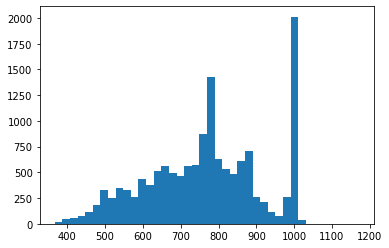

In [11]:
# На данном графике мы видим распределение по высоте
# Попробуем выбрать в ручную фильтрацию где-то в
# пределах от 480 до 890
plt.hist(df_.h, bins=40)
plt.show()

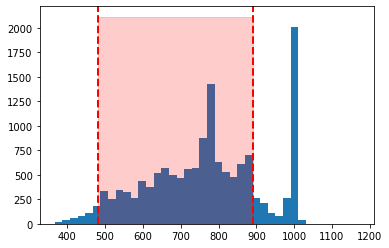

In [13]:
# Отобразим график с явно выраженной фильтрацией
fig, ax = plt.subplots()
ax.hist(df_.h, bins=40)
ax.axvline(480, color='r', linestyle='dashed', linewidth=2)
ax.axvline(890, color='r', linestyle='dashed', linewidth=2)
ax.fill_between([480, 890], 0, ax.get_ylim()[1], color='r', alpha=0.2)
plt.show()

In [14]:
# Отфильтровав dataframe по ширине, 
# мы получили 10817 строк
new_df = df_[(df_.h > 480) & (df_.h < 890)]
new_df.reset_index(drop=True, inplace=True)
new_df

,file_name,center_x,center_y,a,b,c,d,x,y,w,h,ssim,psnr,mse,histDitance,hashPercent,hash
0,./crop/101-70ASt.jpg,656.5,620.0,902.990725,902.990725,902.990725,902.990725,521,366,792,874,0.083973,8.005300,103.801535,256,NaN,NaN
1,./crop/103-v1MO8.jpg,649.0,586.5,874.747535,874.747535,874.747535,874.747535,518,362,780,811,0.080371,8.127448,105.252817,256,NaN,NaN
2,./crop/104-KoaGA.jpg,586.0,557.0,808.483148,808.483148,808.483148,808.483148,471,339,701,775,0.280186,11.908819,97.718728,256,NaN,NaN
3,./crop/105-RZV5V.jpg,580.0,562.0,807.616246,807.616246,807.616246,807.616246,468,339,692,785,0.095611,8.186922,106.418697,256,NaN,NaN
4,./crop/106-OJe4j.jpg,569.0,588.0,818.232852,818.232852,818.232852,818.232852,464,342,674,834,0.129111,9.041742,105.727255,256,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10812,./crop/8152-lx8WQ.jpg,650.5,574.5,867.871246,867.871246,867.871246,867.871246,556,303,745,846,0.154663,12.118454,109.607571,255,99.625000,1.844674e+19
10813,./crop/8153-MPFZK.jpg,595.5,533.0,799.192874,799.192874,799.192874,799.192874,486,293,705,773,0.163389,11.570600,106.281087,256,99.656250,1.838348e+19
10814,./crop/8166-YwAb3.jpg,630.5,618.0,882.867062,882.867062,882.867062,882.867062,533,373,728,863,0.240518,13.626147,104.885400,256,99.703125,1.844674e+19
10815,./crop/8167-1St09.jpg,604.5,591.5,845.749667,845.749667,845.749667,845.749667,516,360,693,823,0.229908,10.912746,101.907494,256,99.671875,9.187342e+18


In [ ]:
# import os
# list_crop = os.listdir('/content/crop')
# list_crop.sort()

In [ ]:
# PIL.Image.open(f'/content/crop/{list_crop[0]}')